In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

# Text Pre-processing libraries
import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

# Tensorflow imports to build the model.
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')


True

In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/Wajihboukhdhir/hate-speech-detection/refs/heads/main/Dataset---Hate-Speech-Detection-using-Deep-Learning.csv')
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [55]:
df.shape

(24783, 2)

In [56]:
import pandas as pd

# Assuming 'df' is your original DataFrame
df_grouped = df.groupby('class')

# Sample 100 rows for each group and store it in a new DataFrame
final_testing_df = df_grouped.apply(lambda x: x.sample(n=100, random_state=42) if len(x) >= 100 else x).reset_index(drop=True)

# Remove the sampled rows from the original DataFrame
df_remaining = df.loc[~df.index.isin(final_testing_df.index)].reset_index(drop=True)
df=df_remaining.copy()
# Display the new DataFrame and remaining DataFrame
print("New DataFrame with 100 rows per class:")
print(final_testing_df.shape)
print("\nRemaining DataFrame after removing sampled rows:")
print(df.shape)

New DataFrame with 100 rows per class:
(300, 2)

Remaining DataFrame after removing sampled rows:
(24483, 2)


**0 - Hate Speech**

**1 - Offensive Language**

**2 - Neither**

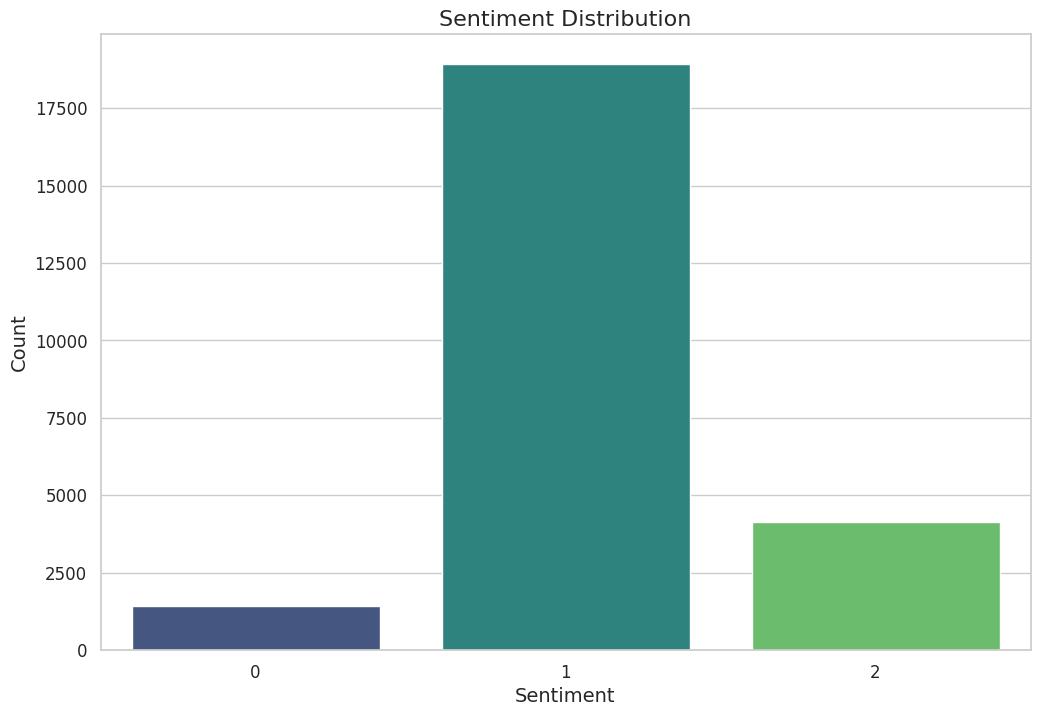

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_counts = df["class"].value_counts()

# Create the bar chart
sns.set_theme(style="whitegrid")  # Set a theme
plt.figure(figsize=(12, 8))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# Add labels and title
plt.title("Sentiment Distribution", fontsize=16)
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the chart
plt.show()

In [58]:
df['tweet'] = df['tweet'].str.lower()


In [59]:
# Removing punctuations present in the text
# This line imports a predefined string containing all common punctuation marks from the string module.
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)

df['tweet']= df['tweet'].apply(lambda x: remove_punctuations(x))
df.head()

,class,tweet
0,1,rapdreams bitches hold they nigga down when he...
1,1,simplycaitlin why do my friends hate me becaus...
2,1,adriwadrri no love for these fuck niggas hoes
3,1,airmaxlad1 hot meat httptcobrz8imk5vk sexy as ...
4,1,airmaxlad1 sniff httptcofhhbbrmybn perved up s...


In [60]:
# remove stop words and lemmatize
def remove_stopwords(text):
    stop_words = stopwords.words('english')

    imp_words = []

    # Storing the important words
    for word in str(text).split():

        if word not in stop_words:

            # Let's Lemmatize the word as well
            # before appending to the imp_words list.

            lemmatizer = WordNetLemmatizer()
            lemmatizer.lemmatize(word)

            imp_words.append(word)

    output = " ".join(imp_words)

    return output


df['tweet'] = df['tweet'].apply(lambda text: remove_stopwords(text))
df.head()

,class,tweet
0,1,rapdreams bitches hold nigga get locked nigga ...
1,1,simplycaitlin friends hate ratchet hoe
2,1,adriwadrri love fuck niggas hoes
3,1,airmaxlad1 hot meat httptcobrz8imk5vk sexy fuc...
4,1,airmaxlad1 sniff httptcofhhbbrmybn perved scal...


In [61]:
def generate_word_cloud(data, category):

    # Combine all tweets to form a single text corpus
    combined_corpus = " ".join(data['tweet'])

    # Configure and generate the word cloud
    wordcloud = WordCloud(
        max_words=100,
        width=200,
        height=100,
        collocations=False
    ).generate(combined_corpus)

    # Display the word cloud
    plt.figure(figsize=(10, 10))
    plt.title(f'Word Cloud for {category} emails', fontsize=15)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

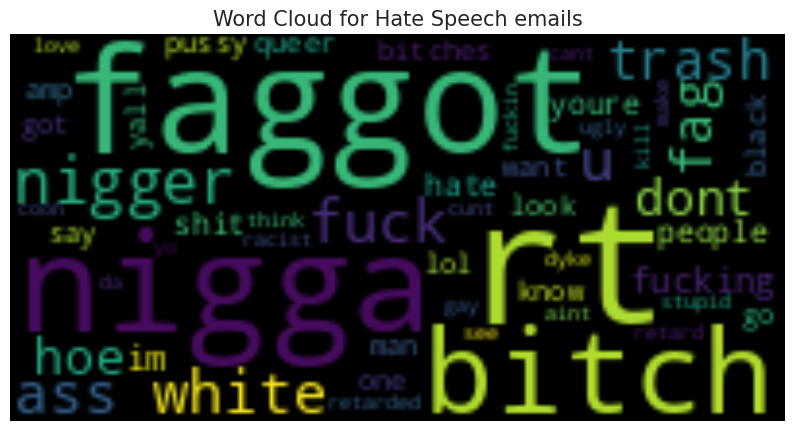

In [62]:
generate_word_cloud(df[df['class']==0], category='Hate Speech')

In [63]:
df['class'].value_counts()

,count
class,
1,18935
2,4126
0,1422


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' is your original DataFrame
X = df.drop(columns=['class'])  # Features (excluding the target column)
y = df['class']  # Target variable

# Separate the classes
class_0 = df[df['class'] == 0]
class_1 = df[df['class'] == 1]
class_2 = df[df['class'] == 2]

# 1. Downsample the majority class (class 1)
class_1_downsampled = class_1.sample(class_0.shape[0] + class_2.shape[0], random_state=42)

# 2. Oversample the minority classes (class 0 and class 2) to match the size of the majority class (after downsampling)
class_0_oversampled = class_0.sample(class_1_downsampled.shape[0], replace=True, random_state=42)
class_2_oversampled = class_2.sample(class_1_downsampled.shape[0], replace=True, random_state=42)

# Combine all classes into a new balanced dataframe
balanced_df = pd.concat([class_1_downsampled, class_0_oversampled, class_2_oversampled])

# Shuffle the new dataframe to mix the samples
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the class distribution
print(balanced_df['class'].value_counts())


class
1    5548
0    5548
2    5548
Name: count, dtype: int64


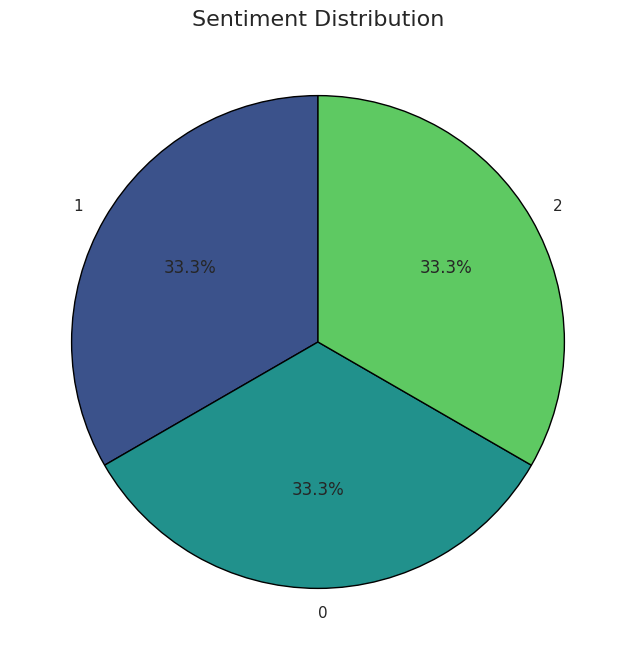

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_counts = balanced_df["class"].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=sns.color_palette("viridis", len(sentiment_counts)).as_hex(), startangle=90, wedgeprops={'edgecolor': 'black'})

# Add a title
plt.title("Sentiment Distribution", fontsize=16)

# Show the chart
plt.show()


In [66]:
features = balanced_df['tweet']
target = balanced_df['class']

X_train, X_val, Y_train, Y_val = train_test_split(features,
                                                  target,
                                                  test_size=0.2,
                                                  random_state=22)
X_train.shape, X_val.shape

((13315,), (3329,))

In [67]:
Y_train = pd.get_dummies(Y_train)
Y_val = pd.get_dummies(Y_val)
Y_train.shape, Y_val.shape

((13315, 3), (3329, 3))

In [68]:
# training the tokenizer
max_words = 5000
token = Tokenizer(num_words=max_words,
                lower=True,
                split=' ')
token.fit_on_texts(X_train)

#Generating token embeddings
Training_seq = token.texts_to_sequences(X_train)
Training_pad = pad_sequences(Training_seq,
                            maxlen=50,
                            padding='post',
                            truncating='post')

Testing_seq = token.texts_to_sequences(X_val)
Testing_pad = pad_sequences(Testing_seq,
                            maxlen=50,
                            padding='post',
                            truncating='post')


In [69]:
print(Training_seq[0])
print(Training_pad[0])
print(X_train.values[0])

[283, 1004, 149, 3150, 657, 255, 3151]
[ 283 1004  149 3150  657  255 3151    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
sinai jihadi group beheads 3 accused spies jews httptco3cdoseli1k via breitbartnews


In [70]:
model = keras.models.Sequential([
    layers.Embedding(max_words, 32, input_length=50,input_shape=(50,)),
    layers.Bidirectional(layers.LSTM(16)),
    layers.Dense(512, activation='relu', kernel_regularizer='l1'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 50, 32)              │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 32)                  │           6,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 186,755 (729.51 KB)

 Trainable params: 185,731 (725.51 KB)

 Non-trainable params: 1,024 (4.00 KB)

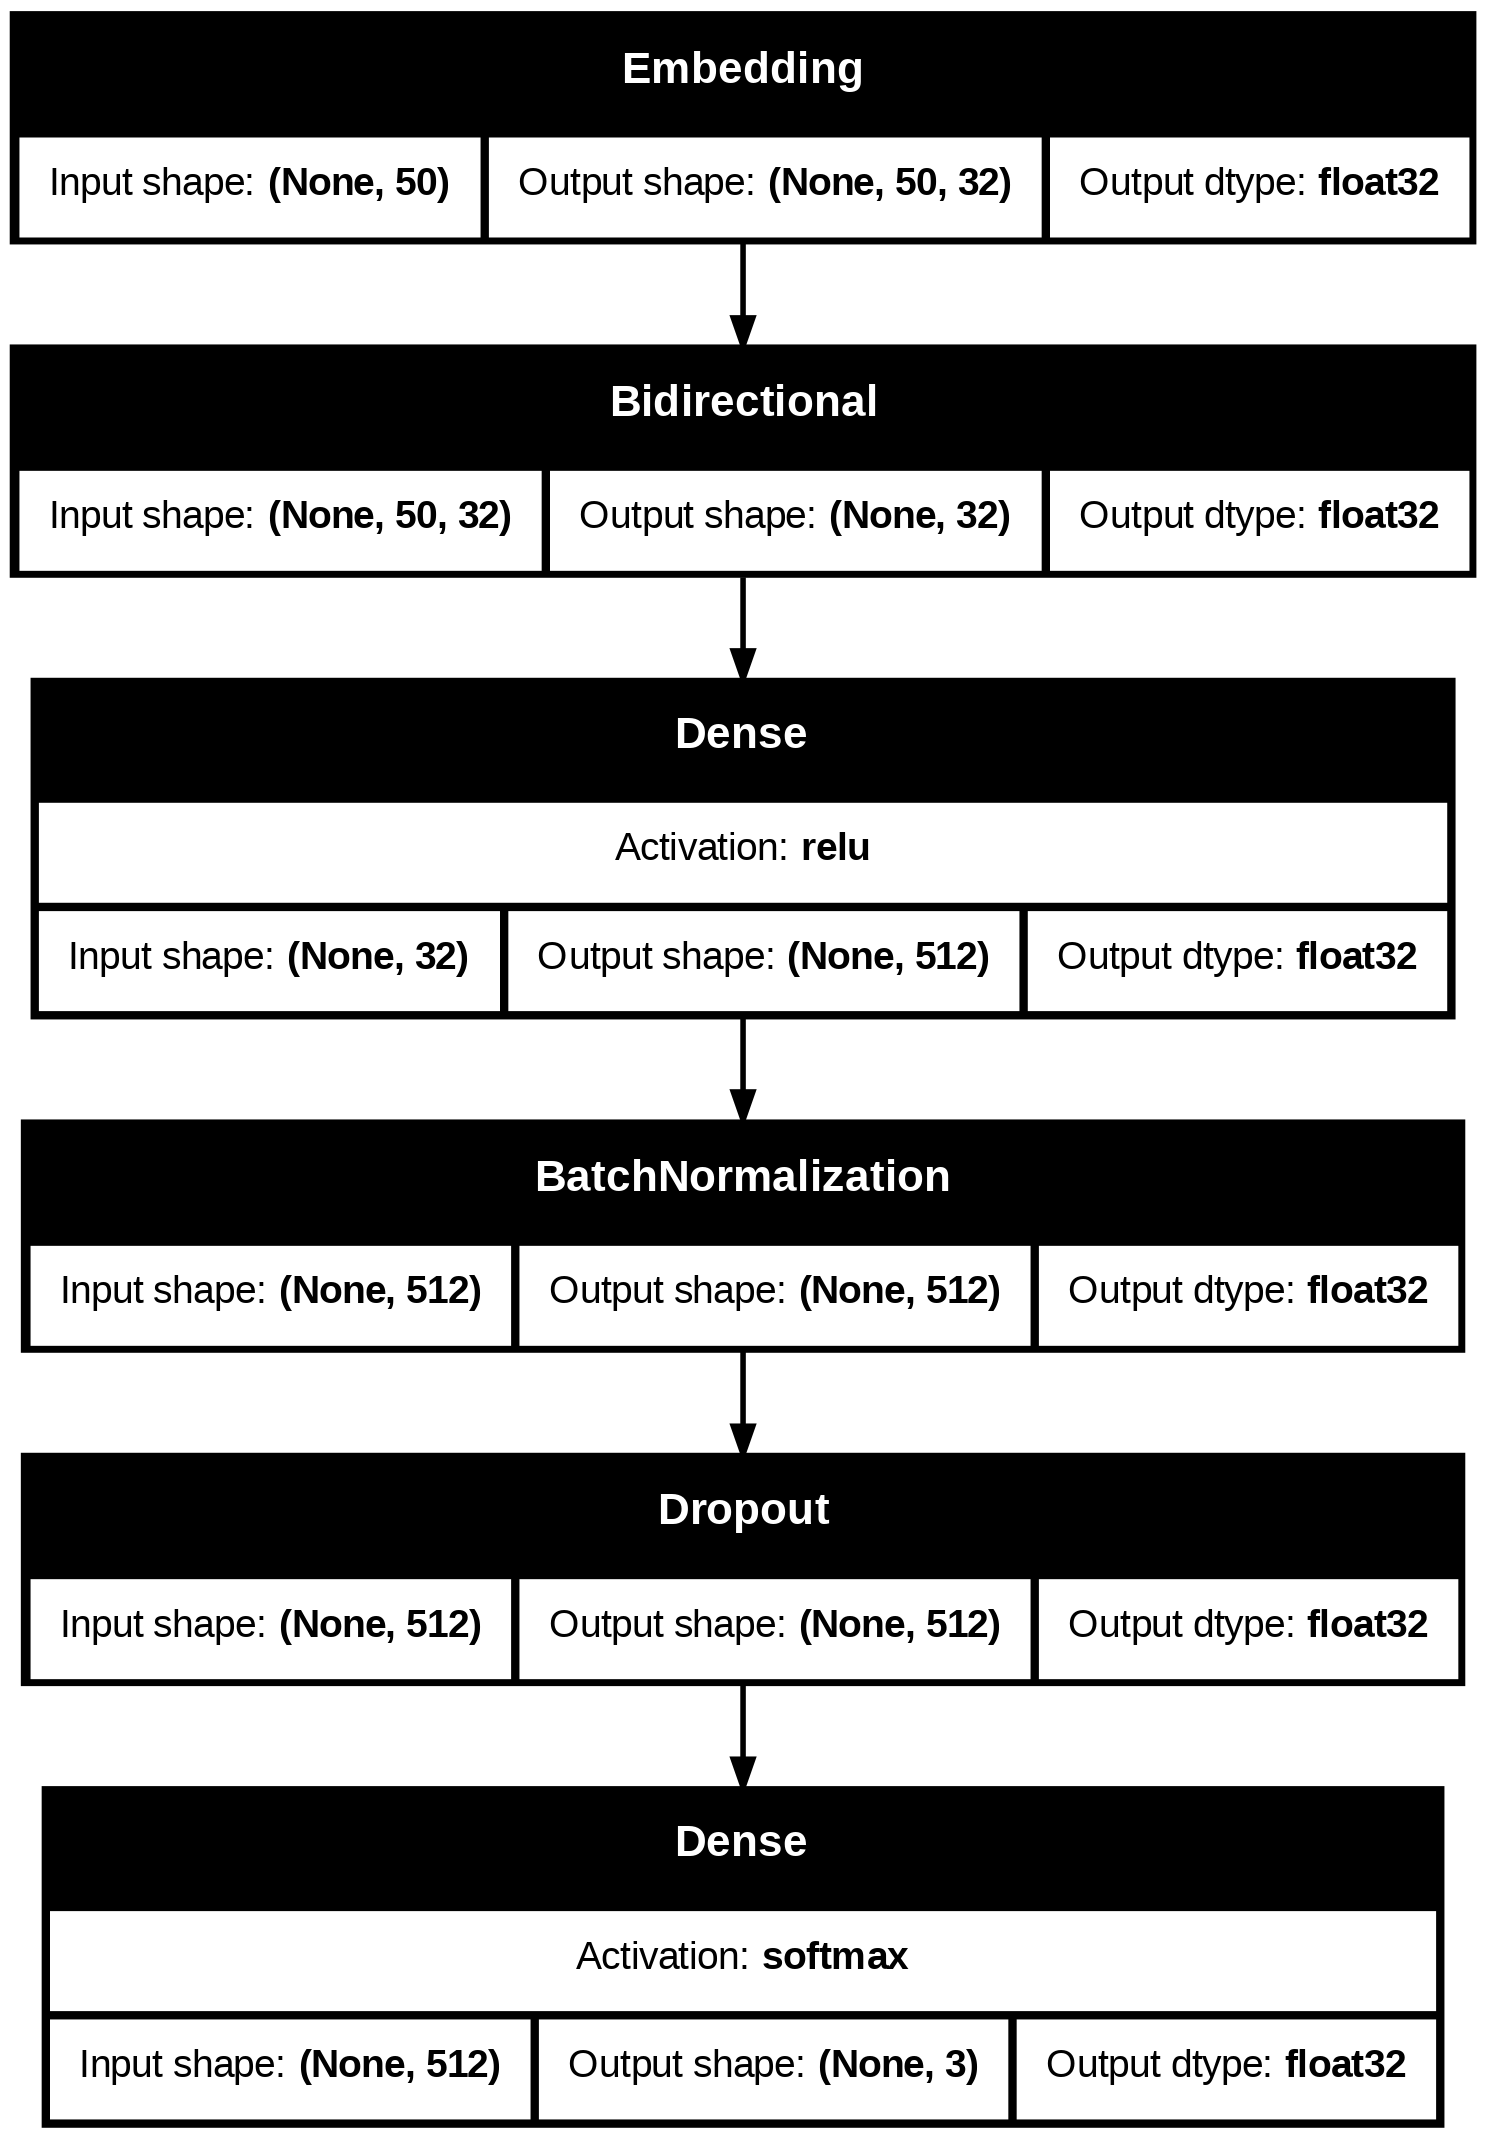

In [71]:
# Add a dummy input to build the model
model.build((None, 50))

keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

In [72]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

es = EarlyStopping(patience=3,
                   monitor = 'val_accuracy',
                   restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,
                       monitor = 'val_loss',
                       factor = 0.5,
                       verbose = 0)

In [73]:
history = model.fit(Training_pad, Y_train,
                    validation_data=(Testing_pad, Y_val),
                    epochs=50,
                    verbose=1,
                    batch_size=32,
                    callbacks=[lr, es])

Epoch 1/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.7190 - loss: 3.1194 - val_accuracy: 0.5804 - val_loss: 0.9060 - learning_rate: 0.0010
Epoch 2/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9157 - loss: 0.3324 - val_accuracy: 0.8495 - val_loss: 0.5226 - learning_rate: 0.0010
Epoch 3/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.9404 - loss: 0.2508 - val_accuracy: 0.8639 - val_loss: 0.4448 - learning_rate: 0.0010
Epoch 4/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9518 - loss: 0.1973 - val_accuracy: 0.9006 - val_loss: 0.3888 - learning_rate: 0.0010
Epoch 5/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9581 - loss: 0.1833 - val_accuracy: 0.8949 - val_loss: 0.4164 - learning_rate: 0.0010
Epoch 6/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.9664 - loss: 0.1609 - val_accuracy: 0.9060 - val_loss: 0.4151 - learning_rate: 0.0010
Epoch 7/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9798 - l

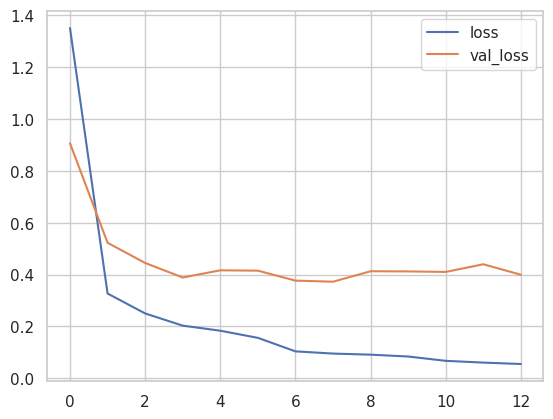

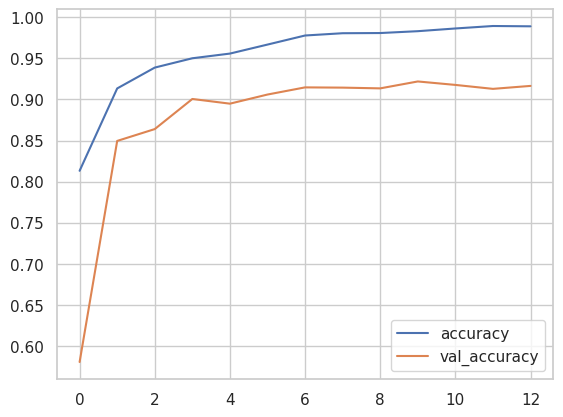

In [74]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

In [75]:
# training the tokenizer
max_words = 5000
token = Tokenizer(num_words=max_words,
                lower=True,
                split=' ')
token.fit_on_texts(X_train)


#Generating token embeddings
final_testing_seq = token.texts_to_sequences(final_testing_df['tweet'])
final_testing_pad = pad_sequences(final_testing_seq,
                            maxlen=50,
                            padding='post',
                            truncating='post')

In [77]:
print(final_testing_seq[0])
print(final_testing_pad[0])


[2433, 3, 98, 13, 4355, 132, 44]
[2433    3   98   13 4355  132   44    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [86]:
# Generate predictions
Y_final_test = final_testing_df['class']
Y_final_test = pd.get_dummies(Y_final_test)
predictions = model.predict(final_testing_pad)

AttributeError: 'History' object has no attribute 'predict'

In [79]:
predictions

array([[9.99963582e-01, 3.56486089e-05, 6.77370963e-07],
       [9.57079351e-01, 4.10875864e-02, 1.83312350e-03],
       [9.99654174e-01, 2.33251238e-04, 1.12569629e-04],
       [2.26958230e-01, 8.78955200e-02, 6.85146213e-01],
       [9.41168547e-01, 5.60904033e-02, 2.74091633e-03],
       [9.58398044e-01, 3.38672660e-02, 7.73458788e-03],
       [9.99085069e-01, 8.90324009e-04, 2.46623185e-05],
       [9.99659181e-01, 1.52112218e-04, 1.88782986e-04],
       [6.44048870e-01, 2.58232296e-01, 9.77188200e-02],
       [9.56703603e-01, 4.24583927e-02, 8.38028849e-04],
       [9.59304988e-01, 3.83417420e-02, 2.35320744e-03],
       [1.19790307e-03, 6.22782507e-04, 9.98179257e-01],
       [9.99002635e-01, 1.71560518e-04, 8.25618336e-04],
       [9.99994695e-01, 3.47022683e-06, 1.73754677e-06],
       [9.35681820e-01, 6.42075390e-02, 1.10682500e-04],
       [9.84225631e-01, 1.03533659e-02, 5.42111183e-03],
       [9.97163832e-01, 2.24093813e-03, 5.95135672e-04],
       [9.97614563e-01, 2.35844

In [82]:
from sklearn.metrics import classification_report

# Assuming predictions are probabilities, convert to class labels
predicted_classes = predictions.argmax(axis=1)  # Get the index of the max probability
true_classes = Y_final_test.values.argmax(axis=1)  # Convert one-hot to class labels




In [83]:
predicted_classes

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [84]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [85]:
# Generate classification report
report = classification_report(true_classes, predicted_classes)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       100
           1       0.89      0.88      0.88       100
           2       0.90      0.95      0.92       100

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [87]:
model.save('hate-speech-detection.h5')


In [89]:
import pickle

with open('model.pkl', 'wb') as files:
    pickle.dump(model,files )